In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

**Data Preparation**

In [ ]:
df=pd.read_csv("/content/Expanded_data_with_more_features.csv");
df.columns
df.head(5)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df.tail(15))
df.info()
print(df.describe())
df["TransportMeans"]=df.TransportMeans.fillna("others");
print(df.isnull().sum());
df["WklyStudyHours"]=df.WklyStudyHours.fillna(df.WklyStudyHours.mode()[0]);
print(df.isnull().sum());
df.dropna(inplace=True);

df['Gender'].astype(str);
df['Average'] = (df['MathScore'] + df['ReadingScore'] + df['WritingScore'])/3;
df['WklyStudyHours']=df['WklyStudyHours'].replace("<5","0-5");
print(df.head())


       Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
30626  female     group C  associate's degree  free/reduced       none   
30627  female     group A         high school      standard  completed   
30628  female     group B                 NaN  free/reduced       none   
30629  female     group D  associate's degree      standard  completed   
30630    male     group B  associate's degree  free/reduced       none   
30631    male     group E    some high school      standard       none   
30632  female     group D        some college      standard       none   
30633  female     group C     master's degree      standard  completed   
30634    male     group A  associate's degree  free/reduced  completed   
30635    male     group C        some college      standard       none   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female         NaN         high

**Data Visualization**


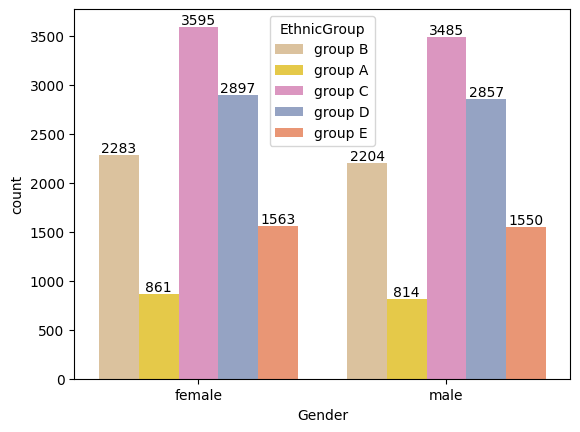

In [ ]:
ax=sns.countplot(x='Gender', data=df,hue="EthnicGroup",palette="Set2_r");
for i in ax.containers:
    ax.bar_label(i);
plt.show()

*Groupwise Male - Female Distribution*


*   Group C has most number of males & females
*   Group A has less number of males & females



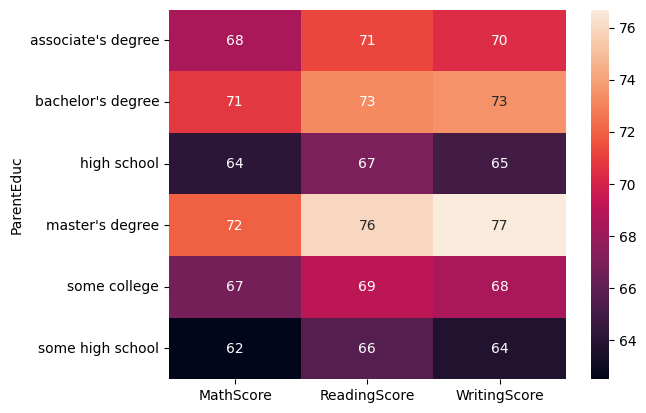

In [ ]:
gb=df.groupby('ParentEduc').agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"});
sns.heatmap(gb,annot=True);

*Checking affection of Parents' Education on students' marks*


*   Students' having parents with Master Degree scored more
*   Students' having parents with unrecognized High School scored Less



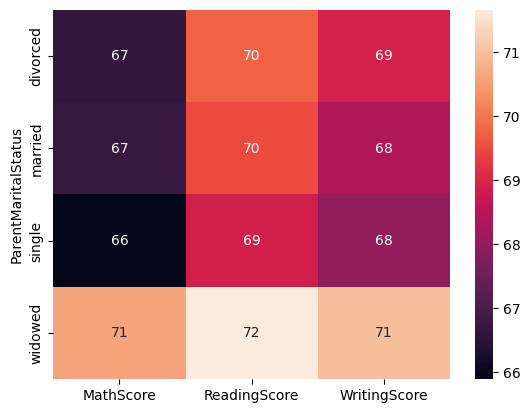

In [ ]:
gb1=df.groupby('ParentMaritalStatus').agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"});
sns.heatmap(gb1,annot=True);

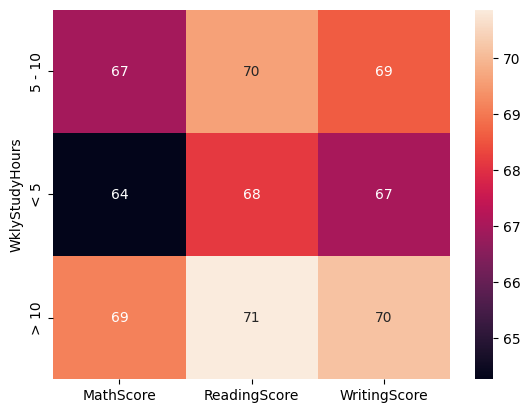

In [ ]:
gb2=df.groupby('WklyStudyHours').agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"});
sns.heatmap(gb2,annot=True);


*Impact of Study Hours on Marks*

 * Not too much impact on average but somehow student who study more , got a little more marks than others



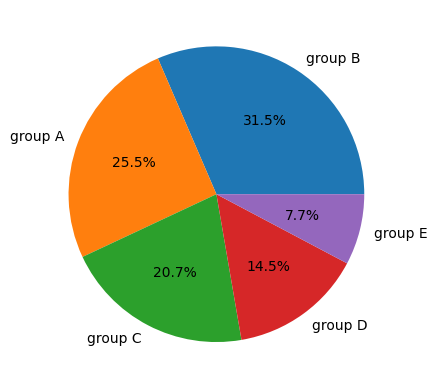

In [ ]:
plt.pie(df.EthnicGroup.value_counts(),labels=df.EthnicGroup.unique(),autopct="%1.1f%%");
plt.show()

*Student population by DIfferent Groups*


*   Group B has most & Group E has less percentage of students




<ipython-input-28-5f2562b2ade9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="LunchType",y="Average",data=df,palette="Set2",errorbar=("ci",0));


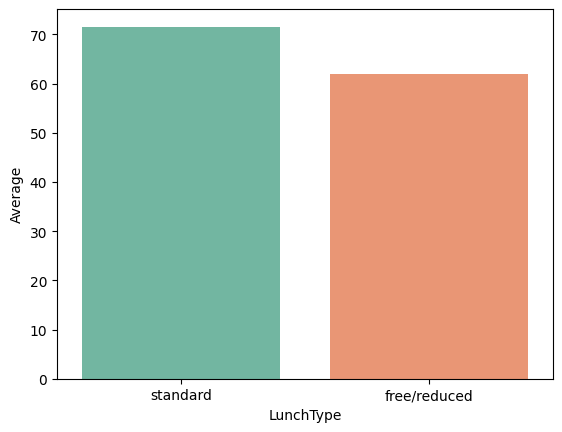

In [ ]:
sns.barplot(x="LunchType",y="Average",data=df,palette="Set2",errorbar=("ci",0));
plt.show()

*Lunchtype Vs Avg Marks*

*   Students under standard lunchtype scored more




<Axes: >

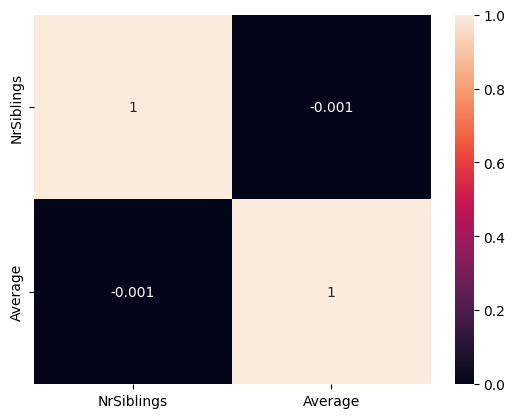

In [ ]:
sns.heatmap(df[['NrSiblings','Average']].corr(),annot=True)

*No of Siblings has .001 negative corelation with Marks*